Multicolinearity is a phenomena where 2 or more variables are highly correlated. In other words ,one predictor varibale can be used to predict the value of another. This creates redundant information ,skewing the resulys in any regression model.


in regression mainly we find out the relation between the dependent and independent variable separately. It can be specified through coeffiecient.
If the dependent variables are highly related to each other,then the contribution of each dependent variable can't be described easily.That creates a skewness in the regression model.



In case of making prediction by linear regression it creates less affect.
But in case of calculating feature importance it creates redundancy.

Multicolinearity can  be detected by :


1.   Domain Knowledge
2.   Scatter plo
3.   heatmap
4. Calculating Pearson correlation coefficients.
5. Variance Inflation Factor

Multicolinearity can  be removed by :
1. Increase more data
2. Remove 1 of the highly correlated independent data
3. Lasso/Ridge regression
4. Performing PCA(principle Components Analysis).






In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/historical_data.csv')

In [5]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [6]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [7]:
df.shape

(197428, 16)

In [8]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [9]:
train_df = df.dropna(how='any')

In [10]:
train_df.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [15]:
train_df.drop(columns =['market_id','created_at','actual_delivery_time'],axis=1,inplace=True)

<ipython-input-15-346cab6c1f4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns =['market_id','created_at','actual_delivery_time'],axis=1,inplace=True)


In [18]:
train_df.drop(['store_primary_category'],axis=1,inplace=True)

<ipython-input-18-409e2cccd95f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['store_primary_category'],axis=1,inplace=True)


In [19]:
train_df.columns

Index(['store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

Correlation Matrix : Show the Pearson correlation between the independent variables of your data.

In [42]:
train_df.dtypes

store_id                                          int64
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [21]:
corr = train_df.corr()

In [43]:
print(type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [23]:
mask  = np.triu(np.ones_like(corr,dtype=bool))

In [24]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True

<Axes: >

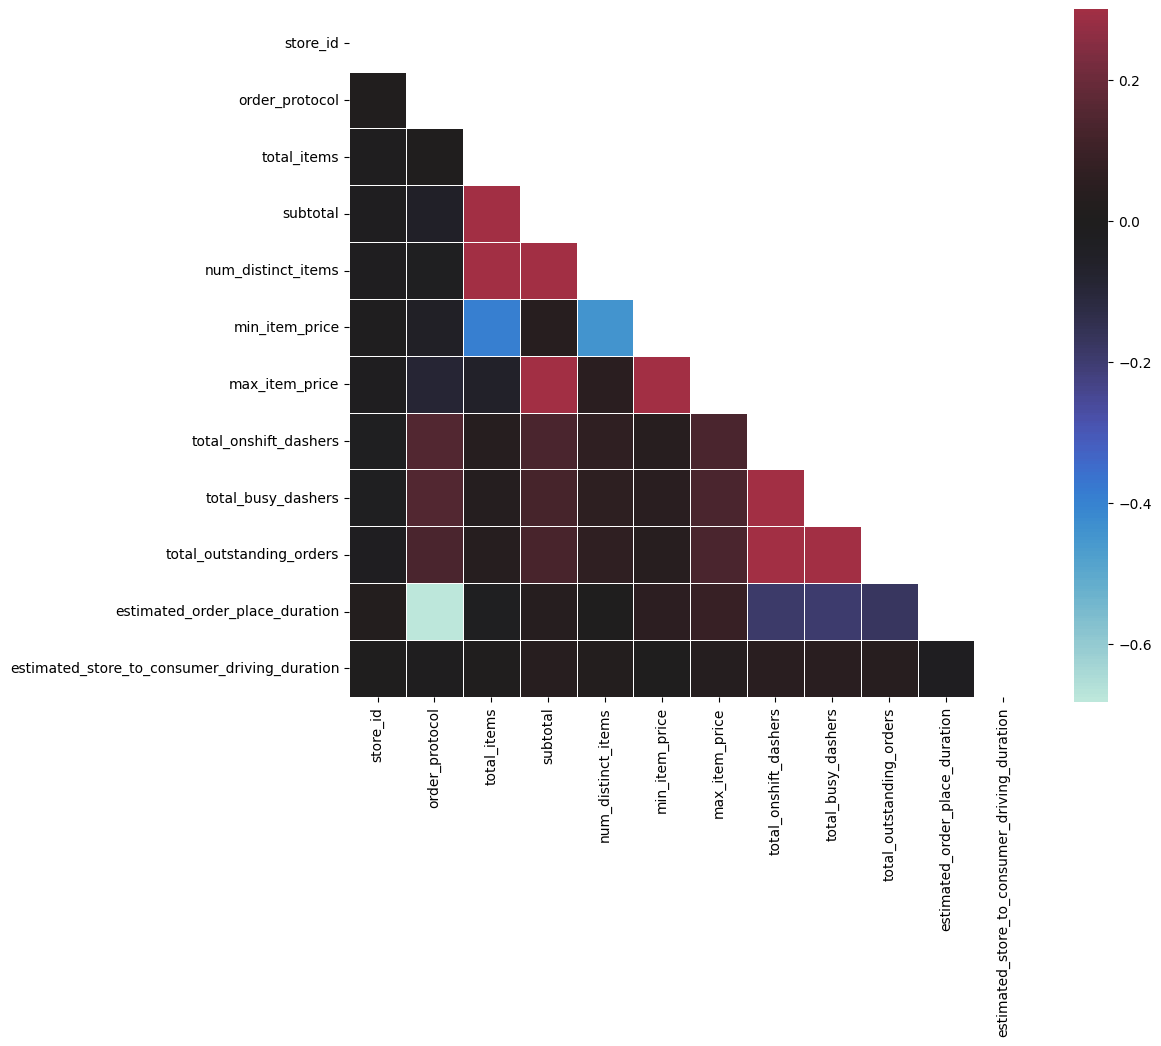

In [32]:
f ,ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr,mask = mask,vmax =0.3,center =0,square =True,linewidth=0.5)

Two function to test the correlation
1.Get Redundant values
2.Find top correlated features

In [47]:
def get_redaundent_pairs(df):
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0,df.shape[1]):
    for j in range(0,i+1):
      pairs_to_drop.add((cols[i],cols[j]))
    return pairs_to_drop

In [48]:
def get_abs_correlations(df,n=5):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redaundent_pairs(df)
  au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending= False)
  return au_corr[0:n]

In [50]:
print("Top absolute correlations")
print(get_abs_correlations(train_df,10))

Top absolute correlations
estimated_store_to_consumer_driving_duration  estimated_store_to_consumer_driving_duration    1.0
total_onshift_dashers                         total_onshift_dashers                           1.0
min_item_price                                min_item_price                                  1.0
subtotal                                      subtotal                                        1.0
total_busy_dashers                            total_busy_dashers                              1.0
num_distinct_items                            num_distinct_items                              1.0
estimated_order_place_duration                estimated_order_place_duration                  1.0
max_item_price                                max_item_price                                  1.0
order_protocol                                order_protocol                                  1.0
total_items                                   total_items                                   

VIF Factor Quantifies the severity of multocolinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [52]:
def compute_vif(features):
  vif_df = pd.DataFrame()
  vif_df['features']=features
  vif_df["VIF"] = [variance_inflation_factor(train_df[features].values,i) for i in range(len(features))]
  return vif_df.sort_values(by=["VIF"]).reset_index(drop=True)

In [53]:
features = train_df.columns.to_list()

In [54]:
features

['store_id',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_order_place_duration',
 'estimated_store_to_consumer_driving_duration']

In [55]:
vif_df = compute_vif(features)


In [56]:
vif_df

,features,VIF
0,store_id,3.869794
1,order_protocol,4.404305
2,min_item_price,5.671467
3,total_items,6.149751
4,estimated_store_to_consumer_driving_duration,6.543328
5,estimated_order_place_duration,9.104453
6,subtotal,10.952178
7,max_item_price,11.887618
8,num_distinct_items,14.285696
9,total_outstanding_orders,21.820639
